In [2]:
!pip install cnn_finetune

     |████████████████████████████████| 58 kB 4.8 MB/s 
  Created wheel for cnn-finetune: filename=cnn_finetune-0.6.0-py3-none-any.whl size=11448 sha256=deb56d937390fef71f4aed6ae6c37855c6ba7aa976e902b79aca3ee65c4c74c4
  Stored in directory: /root/.cache/pip/wheels/f4/ab/20/954e052b50cf464bb0cc1e4917f2a24f0fbc5ac51f60410bb7
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=4bf08339e7c6da9a5f467ab40572012476b9b6d094074ed6539f87ae60dbc1b9
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built cnn-finetune pretrainedmodels


In [3]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.85 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [4]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 47.8 MB 2.1 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [5]:
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [6]:
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import time
import random
from tqdm.autonotebook import tqdm

import cv2
#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

#sklearn
from sklearn.model_selection import StratifiedKFold

#CV
import cv2

################# DETR FUCNTIONS FOR LOSS######################## 
import sys
sys.path.append('./detr/')

from detr.models.matcher import HungarianMatcher
from detr.models.detr import SetCriterion
#################################################################

#Albumenatations
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2

#Glob
from glob import glob
import cv2
import torch
from torch import nn, optim
from torchvision import transforms, datasets, models
from PIL import Image
import tkinter as tk
from tkinter import filedialog
import numpy as np
from cnn_finetune import make_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [7]:
import cv2

In [8]:
!unzip '/content/drive/MyDrive/FaceMaskDataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/49_Greeting_peoplegreeting_49_29.xml  
  inflating: train/49_Greeting_peoplegreeting_49_288.xml  
  inflating: train/49_Greeting_peoplegreeting_49_269.xml  
  inflating: train/49_Greeting_peoplegreeting_49_267.xml  
  inflating: train/49_Greeting_peoplegreeting_49_255.xml  
  inflating: train/49_Greeting_peoplegreeting_49_253.xml  
  inflating: train/49_Greeting_peoplegreeting_49_243.xml  
  inflating: train/49_Greeting_peoplegreeting_49_239.xml  
  inflating: train/49_Greeting_peoplegreeting_49_236.xml  
  inflating: train/49_Greeting_peoplegreeting_49_222.xml  
  inflating: train/49_Greeting_peoplegreeting_49_215.xml  
  inflating: train/49_Greeting_peoplegreeting_49_212.xml  
  inflating: train/49_Greeting_peoplegreeting_49_21.xml  
  inflating: train/49_Greeting_peoplegreeting_49_20.xml  
  inflating: train/49_Greeting_peoplegreeting_49_440.xml  
  inflating: train/49_Greeting_peoplegreeting_49_316.xml  
  inflat

In [9]:
import xml.etree.ElementTree as ET
import os

In [10]:
import csv
f = open('FaceMaskDataset_detr.csv', 'w')
header = ['filename', 'class','width','height','xmin','ymin','xmax','ymax']
writer = csv.writer(f)
writer.writerow(header)

49

In [11]:
for i in os.listdir("/content/train"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
    
          if (i[-3:] == "xml"):
            clas=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/train/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              path =name.text
           
            for width in root.findall(".//size/width"):
              width=width.text
            for height in root.findall(".//size/height"):
              height=height.text
            for obj in root.findall(".//object"):
              clas.append(obj.find('name').text)
              for bndx in obj.findall('.//bndbox'):
                xmin.append(bndx.findtext('xmin'))
                xmax.append(bndx.findtext('xmax'))
                ymin.append(bndx.findtext('ymin'))
                ymax.append(bndx.findtext('ymax'))
            for loo in range(len(clas)):
                if(path[-3:]=='xml'):
                    break
                data = ['/content/train/'+str(path), clas[loo], width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                #data = ['/content/train/'+str(path), 'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                writer.writerow(data)
            
for i in os.listdir("/content/val"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
          if (i[-3:] == "xml"):
            clas=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/val/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              path =name.text
            for width in root.findall(".//size/width"):
              width=width.text
            for height in root.findall(".//size/height"):
              height=height.text
            for obj in root.findall(".//object"):
              clas.append(obj.find('name').text)
              for bndx in obj.findall('.//bndbox'):
                xmin.append(bndx.findtext('xmin'))
                xmax.append(bndx.findtext('xmax'))
                ymin.append(bndx.findtext('ymin'))
                ymax.append(bndx.findtext('ymax'))
            for loo in range(len(clas)):
                if(path[-3:]=='xml'):
                   break
                data = ['/content/val/'+str(path),clas[loo], width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                #data = ['/content/val/'+str(path), 'face', width,height,xmin[loo],ymin[loo],xmax[loo],ymax[loo]]
                writer.writerow(data)
            

           

In [12]:
import pandas as pd
FMD=pd.read_csv('/content/FaceMaskDataset_detr.csv')


In [13]:
!unzip '/content/drive/MyDrive/medical-mask-dataset.zip'

Archive:  /content/drive/MyDrive/medical-mask-dataset.zip
  inflating: Dataset/Medical_Masks_Dataset/Readme.txt  
  inflating: Dataset/Medical_Masks_Dataset/annotations/classes.txt  
  inflating: Dataset/Medical_Masks_Dataset/annotations/instances_images.json  
  inflating: Dataset/Medical_Masks_Dataset/classes.txt  
  inflating: Dataset/Medical_Masks_Dataset/images/1.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/10.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/100.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/101.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/102.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/103.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/104.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/105.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/106.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/107.jpg  
  inflating: Dataset/Medical_Masks_Dataset/images/108.jpg  
  inflating: Dataset/Med

In [14]:
import csv
f = open('MedicalMasksDataset_detr.csv', 'w')
header = ['filename', 'class','width','height','xmin','ymin','xmax','ymax']
writer = csv.writer(f)
writer.writerow(header)

49

In [15]:
for i in os.listdir("/content/Dataset/Medical_Masks_Dataset/xml_labels"):
     #for j in os.listdir("duc2002extracts(1)/"+str(i)):
          if (i[-3:] == "xml"):
            filename=''
            width=''
            height=''
            cls=[]
            xmin=[]
            xmax=[]
            ymin=[]
            ymax=[]
            tree = ET.parse("/content/Dataset/Medical_Masks_Dataset/xml_labels/"+str(i))
            root = tree.getroot()
            for name in root.findall(".//filename"):
              filename=name.text
            if(filename[-3:]=='xml'):
              break
            for size in root.findall(".//size"):
              width=size.find('width').text
              height=size.find('height').text

              
            for objectt in root.findall(".//object"):
              cls.append(objectt.find('name').text)

            for size in root.findall(".//bndbox"):
              xmin.append(size.find('xmin').text)
              ymin.append(size.find('ymin').text)
              xmax.append(size.find('xmax').text)
              ymax.append(size.find('ymax').text)

            for i in range(len(xmin)):
              data = [filename,cls[i], width,height,xmin[i],ymin[i],xmax[i],ymax[i]]
              #data = [filename, 'face', width,height,xmin[i],ymin[i],xmax[i],ymax[i]]
              writer.writerow(data)

In [16]:
import pandas as pd
mdm=pd.read_csv('/content/MedicalMasksDataset_detr.csv')
mdm['filename']='/content/Dataset/Medical_Masks_Dataset/images/'+mdm['filename']
mdm = mdm.loc[mdm['class'] != 'bad']
mdm['class']='face'
mdm



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


filename class  width  height  \
0     /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
1     /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
2     /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
3     /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
4     /content/Dataset/Medical_Masks_Dataset/images/...  face   1500    1000   
...                                                 ...   ...    ...     ...   
3815  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3816  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3817  /content/Dataset/Medical_Masks_Dataset/images/...  face   1300     937   
3818  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   
3819  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   

      xmin  ymin  xmax  ymax  
0        1   120   140   333  
1      220   142   347   308  
2      630   225   752   381  
3     1301   213  1423   354  
4      801   417   881   486  
...    ...   ...   ...   ...  
3815   225   177   374   336  
3816   764   124   941   289  
3817   791   225  1130   594  
3818   276   131   342   197  
3819   533   118   598   172  

[3171 rows x 8 columns]

In [17]:
t_data=FMD.append(mdm)
t_data

filename class  width  height  \
0     /content/train/1_Handshaking_Handshaking_1_102...  face   1024    1024   
1             /content/train/19_Couple_Couple_19_79.jpg  face   1024     640   
2             /content/train/19_Couple_Couple_19_79.jpg  face   1024     640   
3     /content/train/13_Interview_Interview_On_Locat...  face   1024     810   
4            /content/train/19_Couple_Couple_19_230.jpg  face   1024     768   
...                                                 ...   ...    ...     ...   
3815  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3816  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3817  /content/Dataset/Medical_Masks_Dataset/images/...  face   1300     937   
3818  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   
3819  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   

      xmin  ymin  xmax  ymax  
0      489   290   509   305  
1      670   163   706   217  
2      705   152   740   204  
3      364   190   660   610  
4      508   236   560   302  
...    ...   ...   ...   ...  
3815   225   177   374   336  
3816   764   124   941   289  
3817   791   225  1130   594  
3818   276   131   342   197  
3819   533   118   598   172  

[18475 rows x 8 columns]

In [18]:
full_data=t_data
full_data

filename class  width  height  \
0     /content/train/1_Handshaking_Handshaking_1_102...  face   1024    1024   
1             /content/train/19_Couple_Couple_19_79.jpg  face   1024     640   
2             /content/train/19_Couple_Couple_19_79.jpg  face   1024     640   
3     /content/train/13_Interview_Interview_On_Locat...  face   1024     810   
4            /content/train/19_Couple_Couple_19_230.jpg  face   1024     768   
...                                                 ...   ...    ...     ...   
3815  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3816  /content/Dataset/Medical_Masks_Dataset/images/...  face   1240     698   
3817  /content/Dataset/Medical_Masks_Dataset/images/...  face   1300     937   
3818  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   
3819  /content/Dataset/Medical_Masks_Dataset/images/...  face    800     600   

      xmin  ymin  xmax  ymax  
0      489   290   509   305  
1      670   163   706   217  
2      705   152   740   204  
3      364   190   660   610  
4      508   236   560   302  
...    ...   ...   ...   ...  
3815   225   177   374   336  
3816   764   124   941   289  
3817   791   225  1130   594  
3818   276   131   342   197  
3819   533   118   598   172  

[18475 rows x 8 columns]

In [19]:
full_data.to_csv('/content/final_dataset.csv')

In [20]:
marking = pd.read_csv('/content/final_dataset.csv')
marking = marking.sample(frac = 1)
marking

Unnamed: 0                                           filename  \
16481        1399  /content/Dataset/Medical_Masks_Dataset/images/...   
1486         1486  /content/train/13_Interview_Interview_On_Locat...   
17186        2279  /content/Dataset/Medical_Masks_Dataset/images/...   
18242        3559  /content/Dataset/Medical_Masks_Dataset/images/...   
8058         8058  /content/train/28_Sports_Fan_Sports_Fan_28_520...   
...           ...                                                ...   
6875         6875                   /content/train/test_00003223.jpg   
3108         3108  /content/train/16_Award_Ceremony_Awards_Ceremo...   
12929       12929           /content/val/38_Tennis_Tennis_38_300.jpg   
1117         1117         /content/train/38_Tennis_Tennis_38_120.jpg   
17870        3101  /content/Dataset/Medical_Masks_Dataset/images/...   

           class  width  height  xmin  ymin  xmax  ymax  
16481       face   1280     853   424   342   470   394  
1486        face   1024     768   828   122   980   342  
17186       face   1200     650   349   405   421   476  
18242       face   1024     768    74   168   119   208  
8058        face   1024    1366   587   181   680   328  
...          ...    ...     ...   ...   ...   ...   ...  
6875   face_mask    800     800   340   507   459   648  
3108        face   1024     683   340   610   389   682  
12929       face   1024     567   272    84   424   288  
1117        face   1024    1366   510   521   555   599  
17870       face   1200     675   303    90   341   149  

[18475 rows x 9 columns]

In [21]:
marking['w']=marking['xmax']-marking['xmin']
marking['h']=marking['ymax']-marking['ymin']
marking["class"]=marking["class"].replace("face_nask", "face_mask")


In [22]:
marking["class"]=marking["class"].replace("face_mask", "1")
marking["class"]=marking["class"].replace("face", "0")

In [23]:
class0_data = marking.loc[marking['class'] == "0"]
class0_data = class0_data.sample(n = 2718) 

In [24]:
class1_data = marking.loc[marking['class'] == "1"]

In [25]:
class0_data=class0_data.append(class1_data)
marking=class0_data
marking

Unnamed: 0                                           filename class  \
1011         1011  /content/train/1_Handshaking_Handshaking_1_464...     0   
15253       15253   /content/val/1_Handshaking_Handshaking_1_827.jpg     0   
15838         620  /content/Dataset/Medical_Masks_Dataset/images/...     0   
4604         4604         /content/train/38_Tennis_Tennis_38_774.jpg     0   
7909         7909  /content/train/31_Waiter_Waitress_Waiter_Waitr...     0   
...           ...                                                ...   ...   
10383       10383                   /content/train/test_00002701.jpg     1   
8333         8333                   /content/train/test_00003392.jpg     1   
5671         5671                   /content/train/test_00002772.jpg     1   
15224       15224                     /content/val/test_00002478.jpg     1   
6875         6875                   /content/train/test_00003223.jpg     1   

       width  height  xmin  ymin  xmax  ymax    w    h  
1011    1024    1098   576   257   700   431  124  174  
15253   1024     684   190    60   262   228   72  168  
15838   1000     667   519   150   549   190   30   40  
4604    1024     768   196   546   203   558    7   12  
7909    1024     347   255   195   272   232   17   37  
...      ...     ...   ...   ...   ...   ...  ...  ...  
10383    200     200    92    18   180   148   88  130  
8333     500     349   286    50   358   141   72   91  
5671     599     452   204    58   362   276  158  218  
15224    400     266   123    62   266   242  143  180  
6875     800     800   340   507   459   648  119  141  

[5436 rows x 11 columns]

In [26]:
train_size=int(marking.shape[0]*0.2)
train_data=marking.iloc[:train_size,1:]
test_data=marking.iloc[train_size:,1:]

In [27]:
df_test = test_data[['filename']].copy()
df_test.loc[:, 'bbox_count'] = 1
df_test = df_test.groupby('filename').count()
df_test.loc[:, 'class'] = test_data[['filename', 'class']].groupby('filename').max()['class']
df_test.loc[:, 'stratify_group'] = np.char.add(
    df_test['class'].values.astype(str),
    df_test['bbox_count'].apply(lambda x: f'_{x // 15}').values.astype(str))

In [28]:
df_test = df_test.sample(frac = 1)

In [29]:
def get_test_transforms():
    return A.Compose([A.Resize(height=512, width=512, p=1.0),
                      ToTensorV2(p=1.0)], 
                      p=1.0, 
                      bbox_params=A.BboxParams(format='coco',min_area=0, min_visibility=0,label_fields=['labels'])
                      )

In [30]:
DIR_TRAIN = '/content/valid'

class WheatDataset(Dataset):
    def __init__(self,image_ids,dataframe,transforms=None):
        self.image_ids = image_ids
        self.df = dataframe
        self.transforms = transforms
        
        
    def __len__(self) -> int:
        return self.image_ids.shape[0]
    
    def __getitem__(self,index):
        image_id = self.image_ids[index]
        records = self.df[self.df['filename'] == image_id]

        image = cv2.imread(image_id, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        # DETR takes in data in coco format 
        boxes = records[['xmin', 'ymin','w', 'h']].values        
        #Area of bb
        area = ((boxes[:,2])*(boxes[:,3]))
        area = torch.as_tensor(area, dtype=torch.float32)
        
        # AS pointed out by PRVI It works better if the main class is labelled as zero
        labels =  np.zeros(len(boxes), dtype=np.int32)

        
        if self.transforms:
            sample = {
                'image': image,
                'bboxes': boxes,
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            boxes = sample['bboxes']
            labels = sample['labels']
            
            
        #Normalizing BBOXES
            
        _,h,w = image.shape
        boxes = A.augmentations.bbox_utils.normalize_bboxes(sample['bboxes'],rows=h,cols=w)
        target = {}
        target['boxes'] = torch.as_tensor(boxes,dtype=torch.float32)
        target['labels'] = torch.as_tensor(labels,dtype=torch.long)
        target['filename'] = torch.tensor([index])
        target['area'] = area
        
        return image, target, image_id

In [31]:

class DETRModel(nn.Module):
    def __init__(self,num_classes,num_queries):
        super(DETRModel,self).__init__()
        self.num_classes = num_classes
        self.num_queries = num_queries
        
        self.model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
        self.in_features = self.model.class_embed.in_features
        
        self.model.class_embed = nn.Linear(in_features=self.in_features,out_features=self.num_classes)
        self.model.num_queries = self.num_queries
        
    def forward(self,images):
        return self.model(images)

In [32]:
device = torch.device('cuda')
model = DETRModel(num_classes=2,num_queries=100)
model = model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/detr_best.pth'))

Downloading: "https://github.com/facebookresearch/detr/archive/main.zip" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

<All keys matched successfully>

In [33]:
from PIL import Image
import torchvision.transforms
import torchvision.transforms.functional as TF
import torchvision.utils as vutils
import scipy
import time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [80]:
def view_sample(df_test,model,device):
    test_dataset = WheatDataset(image_ids=df_test.index.values,
                                 dataframe=marking,
                                 transforms=get_test_transforms())
    test_data_loader = DataLoader(test_dataset,batch_size=20,shuffle=False,num_workers=2,collate_fn=collate_fn)
    images, targets, image_ids = next(iter(test_data_loader))
    _,h,w = images[1].shape # for de normalizing images
    start = time.time()
    images = list(img.to(device) for img in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    boxes = targets[1]['boxes'].cpu().numpy()
    boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]
    sample = images[1].permute(1,2,0).cpu().numpy()
    model.eval()
    model.to(device)
    cpu_device = torch.device("cpu")
    with torch.no_grad():
        outputs = model(images)
    outputs = [{k: v.to(cpu_device) for k, v in outputs.items()}]
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    alexnetmodel = make_model('alexnet', num_classes=2, pretrained=True,input_size=(224, 224))
    alexnetmodel.load_state_dict(torch.load('/content/drive/MyDrive/maskfacedetectiontr/alexnet.pt'))
    for box in boxes:
        
        
        class_names=['without mask','with mask']
        #plt.imsave("onePic.jpg", images[0])
        img = np.asarray(sample[box[1]:box[3]+box[1],box[0]:box[2]+box[0],:]).astype('float32')
        imm=Image.fromarray((img * 255).astype(np.uint8))
        #vutils.save_image(sample, "first_method.jpg")
        imm.save("mm.jpg")
        image = Image.open("mm.jpg")
        prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                                    transforms.ToTensor()])
        # discard the transparent, alpha channel (that's the :3) and add the batch dimension
        image = prediction_transform(image)[:3, :, :].unsqueeze(0)
        alexnetmodel = alexnetmodel.cpu()
        alexnetmodel.eval()
        idx = torch.argmax(alexnetmodel(image))
        clas=class_names[idx]
        # org
        org = (box[0], box[1])
        
        font = cv2.FONT_HERSHEY_DUPLEX
        # fontScale
        fontScale = 1
          
        # Red color in BGR
        if(clas=='without mask'):
            color = (125, 246, 55)
        if (clas=='with mask'):
            color = (0,255,0)
          
        # Line thickness of 2 px
        thickness = 2

        cv2.rectangle(sample,
                (box[0], box[1]),
                (box[2]+box[0], box[3]+box[1]),
                color, 3)
        # Using cv2.putText() method
        image = cv2.putText(sample, clas, org, font, fontScale, 
                        color, thickness, cv2.LINE_AA)

      
      

     
        #cv2.imwrite('sample.jpg',sample[box[1]:box[3]+box[1],box[0]:box[2]+box[0],:])
        

    oboxes = outputs[0]['pred_boxes'][0].detach().cpu().numpy()
    oboxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(oboxes,h,w)]
    prob   = outputs[0]['pred_logits'][0].softmax(1).detach().cpu().numpy()[:,0]
    
    
    for box,p in zip(oboxes,prob):
        
        if p >0.8:
          pass
       
          #cv2.rectangle(sample,
               # (box[0], box[1]),
                #(box[2]+box[0], box[3]+box[1]),
                #color, 3)
         
    end = time.time()
    print("runing time=  {}".format(end-start))
    ax.set_axis_off()
    ax.imshow(sample)

In [81]:
def collate_fn(batch):
    return tuple(zip(*batch))

/root/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


runing time=  2.838268995285034


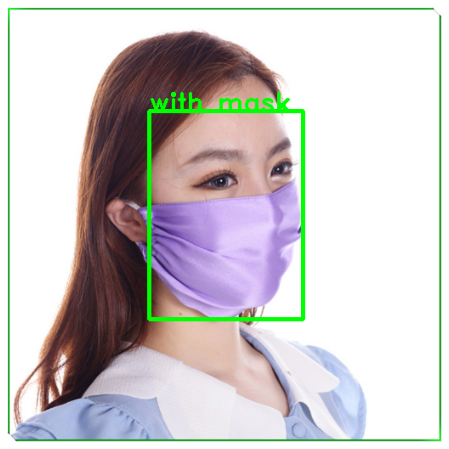

In [71]:
view_sample(df_test,model=model,device=torch.device('cuda'))

In [78]:
def view_sample(df_test,model,device):
    test_dataset = WheatDataset(image_ids=df_test.index.values,
                                 dataframe=marking,
                                 transforms=get_test_transforms())
    test_data_loader = DataLoader(test_dataset,batch_size=20,shuffle=False,num_workers=2,collate_fn=collate_fn)
    images, targets, image_ids = next(iter(test_data_loader))
    _,h,w = images[0].shape # for de normalizing images
    start = time.time()
    images = list(img.to(device) for img in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    boxes = targets[0]['boxes'].cpu().numpy()
    boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]
    sample = images[0].permute(1,2,0).cpu().numpy()
    model.eval()
    model.to(device)
    cpu_device = torch.device("cpu")
    with torch.no_grad():
        outputs = model(images)
    outputs = [{k: v.to(cpu_device) for k, v in outputs.items()}]
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    alexnetmodel = make_model('alexnet', num_classes=2, pretrained=True,input_size=(224, 224))
    alexnetmodel.load_state_dict(torch.load('/content/drive/MyDrive/maskfacedetectiontr/alexnet.pt'))
    for box in boxes:
        
        
        class_names=['without mask','with mask']
        #plt.imsave("onePic.jpg", images[0])
        img = np.asarray(sample[box[1]:box[3]+box[1],box[0]:box[2]+box[0],:]).astype('float32')
        imm=Image.fromarray((img * 255).astype(np.uint8))
        #vutils.save_image(sample, "first_method.jpg")
        imm.save("mm.jpg")
        image = Image.open("mm.jpg")
        prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                                    transforms.ToTensor()])
        # discard the transparent, alpha channel (that's the :3) and add the batch dimension
        image = prediction_transform(image)[:3, :, :].unsqueeze(0)
        alexnetmodel = alexnetmodel.cpu()
        alexnetmodel.eval()
        idx = torch.argmax(alexnetmodel(image))
        clas=class_names[idx]
        # org
        org = (box[0], box[1])
        
        font = cv2.FONT_HERSHEY_DUPLEX
        # fontScale
        fontScale = 1
          
        # Red color in BGR
        if(clas=='without mask'):
            color = (220, 0, 0)
        if (clas=='with mask'):
            color = (0,0,225)
          
        # Line thickness of 2 px
        thickness = 2

        cv2.rectangle(sample,
                (box[0], box[1]),
                (box[2]+box[0], box[3]+box[1]),
                color, 3)
        # Using cv2.putText() method
        image = cv2.putText(sample, clas, org, font, fontScale, 
                        color, thickness, cv2.LINE_AA)

      
      

     
        #cv2.imwrite('sample.jpg',sample[box[1]:box[3]+box[1],box[0]:box[2]+box[0],:])
        

    oboxes = outputs[0]['pred_boxes'][0].detach().cpu().numpy()
    oboxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(oboxes,h,w)]
    prob   = outputs[0]['pred_logits'][0].softmax(1).detach().cpu().numpy()[:,0]
    
    
    for box,p in zip(oboxes,prob):
        
        if p >0.8:
          pass
       
          #cv2.rectangle(sample,
               # (box[0], box[1]),
                #(box[2]+box[0], box[3]+box[1]),
                #color, 3)
         
    end = time.time()
    print("runing time=  {}".format(end-start))
    ax.set_axis_off()
    ax.imshow(sample)

In [79]:
view_sample(df_test,model=model,device=torch.device('cuda'))

/root/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


runing time=  2.847963571548462


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print()

[0 0 0]


In [ ]:
device = torch.device('cuda')
model = DETRModel(num_classes=2,num_queries=100)
model = model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/detr_best.pth'))
alexnetmodel = make_model('alexnet', num_classes=2, pretrained=True,input_size=(224, 224))
alexnetmodel.load_state_dict(torch.load('/content/drive/MyDrive/alexnet.pt'))
class_names=[1,0]
cla=[]
clas=[]
test_dataset = WheatDataset(image_ids=df_test.index.values,
                              dataframe=marking,
                              transforms=get_test_transforms())
test_data_loader = DataLoader(test_dataset,batch_size=300,shuffle=False,num_workers=2,collate_fn=collate_fn)
images, targets, image_ids = next(iter(test_data_loader))
start = time.time()
_,h,w = images[0].shape # for de normalizing images
images = list(img.to(device) for img in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
for i in range(len(images)):

        boxes = targets[i]['boxes'].cpu().numpy()
        boxes = [np.array(box).astype(np.int32) for box in A.augmentations.bbox_utils.denormalize_bboxes(boxes,h,w)]
        sample = images[i].permute(1,2,0).cpu().numpy()
        model.eval()
        model.to(device)
        cpu_device = torch.device("cpu")
        for box in boxes:
          #plt.imsave("onePic.jpg", images[0])
          img = np.asarray(sample[box[1]:box[3]+box[1],box[0]:box[2]+box[0],:]).astype('float32')
          imm=Image.fromarray((img * 255).astype(np.uint8))
          #vutils.save_image(sample, "first_method.jpg")
          imm.save("mm.jpg")
          image = Image.open("mm.jpg")
          prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                                      transforms.ToTensor()])
          # discard the transparent, alpha channel (that's the :3) and add the batch dimension
          image = prediction_transform(image)[:3, :, :].unsqueeze(0)
          alexnetmodel = alexnetmodel.cpu()
          alexnetmodel.eval()
          idx = torch.argmax(alexnetmodel(image))
          try:
            cla.append(int(marking['class'].loc[marking['filename'] ==image_ids[i]]))
            clas.append(class_names[idx])
          except:
            pass
     

real=cla
pred=clas
print("accuracy=" + str(accuracy_score(real, pred)))
print("average recall=" + str(recall_score(real, pred, average='macro')))
print("average precision=" + str(precision_score(real, pred, average='macro')))
print("average F1=" + str(f1_score(real, pred, average='macro')))

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main


accuracy=0.9012345679012346
average recall=0.8682232528386374
average precision=0.8941961992809451
average F1=0.8796036333608588
